In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: D258-06D3

 Directorio de C:\Users\Sergio\Documents\IA\Projects\car_prediction

07/07/2022  00:55    <DIR>          .
07/07/2022  00:55    <DIR>          ..
06/07/2022  20:13    <DIR>          .ipynb_checkpoints
07/07/2022  00:55            62.206 Build_model_car_prediction.ipynb
06/07/2022  13:18                62 car_prediction.py
06/07/2022  11:38         2.201.879 car_price_prediction.csv
06/07/2022  20:24         1.626.495 clean_car_prediction.csv
06/07/2022  20:26           118.353 clean_prediction_car.ipynb
               5 archivos      4.008.995 bytes
               3 dirs  48.897.589.248 bytes libres


In [3]:
data=pd.read_csv('clean_car_prediction.csv')
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901 km,4.0,Automatic,Front,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,4.0,Manual,Rear,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,4.0,Automatic,Front,Black,4


## Building model

In [4]:
list([str(d) for d in data.dtypes])

['int64',
 'int64',
 'object',
 'object',
 'int64',
 'object',
 'object',
 'object',
 'object',
 'float64',
 'object',
 'object',
 'object',
 'int64']

In [5]:
#DATOS CATEGORICOS A NUMERICOS
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column=='object':
        data[data.columns[i]]=data[data.columns[i]].astype('category').cat.codes

In [6]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,2838,6.0,0,0,12,12
1,16621,1018,8,658,2011,4,0,5,2960,6.0,2,0,1,8
2,8467,906,21,684,2006,3,0,5,3140,4.0,3,1,1,2
3,3607,862,16,661,2011,4,1,2,2413,4.0,0,0,14,0
4,11726,446,21,684,2014,3,1,5,7396,4.0,0,1,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906,36,385,1999,1,1,0,4394,4.0,1,2,12,5
19233,15681,831,23,1334,2011,9,1,5,2214,4.0,2,1,11,8
19234,26108,836,23,1442,2010,4,1,1,638,4.0,0,1,7,4
19235,5331,1288,8,456,2007,4,1,1,5612,4.0,0,1,1,4


In [7]:
data.dtypes

Price                 int64
Levy                  int64
Manufacturer           int8
Model                 int16
Prod. year            int64
Category               int8
Leather interior       int8
Fuel type              int8
Mileage               int16
Cylinders           float64
Gear box type          int8
Drive wheels           int8
Color                  int8
Airbags               int64
dtype: object

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
y=data.pop('Price')
X=data.copy()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Sklearn linear regresion

In [11]:
reg=LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.0023240784054375796

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [13]:
reg.predict(X_test)

array([16070.31961568, 24901.05976642, 20444.98473283, ...,
        6992.1218408 , -4423.43200042, 21241.24818672])

In [14]:
y_test

736      27284
8674     10349
5971     40769
1957     38737
11075    42102
         ...  
19094    11290
2057     15681
8309      4077
9231      6899
13425    23521
Name: Price, Length: 5772, dtype: int64

In [15]:
mse(y_test,reg.predict(X_test))

395282691.79181993

In [16]:
mae(y_test,reg.predict(X_test))

13389.722556939578

### sklearn MLPRegressor

In [17]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=150).fit(X_train, y_train)
regr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


array([15095.06480185, 14798.44918239, 15192.4016278 , ...,
       13327.29384318, 11510.9312885 , 28318.81660274])

In [18]:
regr.score(X_train, y_train)

0.0019280091496363116

In [19]:
mse(y_test,regr.predict(X_test))

385829369.42894316

In [20]:
mae(y_test,regr.predict(X_test))

12604.698256170768

### Keras

In [21]:
import tensorflow as tf
from tensorflow import keras

In [55]:
input_data=X_train.shape[1]
model=keras.models.Sequential()
model.add(keras.layers.Dense(32,activation='relu',input_shape=(input_data,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))


In [56]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [57]:
callback_early=tf.keras.callbacks.EarlyStopping(monitor="mae", patience=20, mode="auto")
history=model.fit(X_train,y_train,epochs=150, callbacks=([callback_early]))

Epoch 1/150
421/421 [==============================] - 1s 762us/step - loss: 51840663552.0000 - mae: 15960.4248
Epoch 2/150
421/421 [==============================] - 0s 769us/step - loss: 51758116864.0000 - mae: 15173.6436
Epoch 3/150
421/421 [==============================] - 0s 764us/step - loss: 51790245888.0000 - mae: 15084.7070
Epoch 4/150
421/421 [==============================] - 0s 810us/step - loss: 51719880704.0000 - mae: 15013.3369
Epoch 5/150
421/421 [==============================] - 0s 779us/step - loss: 51747258368.0000 - mae: 14944.8545
Epoch 6/150
421/421 [==============================] - 0s 764us/step - loss: 51746893824.0000 - mae: 14929.5830
Epoch 7/150
421/421 [==============================] - 0s 833us/step - loss: 51790852096.0000 - mae: 14970.0039
Epoch 8/150
421/421 [==============================] - 0s 767us/step - loss: 51718680576.0000 - mae: 14917.4551
Epoch 9/150
421/421 [==============================] - 0s 764us/step - loss: 51762106368.0000 - mae: 149

421/421 [==============================] - 0s 836us/step - loss: 51753816064.0000 - mae: 14596.1855
Epoch 74/150
421/421 [==============================] - 0s 798us/step - loss: 51761582080.0000 - mae: 14668.0264
Epoch 75/150
421/421 [==============================] - 0s 762us/step - loss: 51752099840.0000 - mae: 14641.9297
Epoch 76/150
421/421 [==============================] - 0s 764us/step - loss: 51720855552.0000 - mae: 14599.1455
Epoch 77/150
421/421 [==============================] - 0s 762us/step - loss: 51714445312.0000 - mae: 14604.9092
Epoch 78/150
421/421 [==============================] - 0s 767us/step - loss: 51755180032.0000 - mae: 14614.9824
Epoch 79/150
421/421 [==============================] - 0s 766us/step - loss: 51782361088.0000 - mae: 14575.4912
Epoch 80/150
421/421 [==============================] - 0s 774us/step - loss: 51767767040.0000 - mae: 14608.3779
Epoch 81/150
421/421 [==============================] - 0s 779us/step - loss: 51772452864.0000 - mae: 14532.8

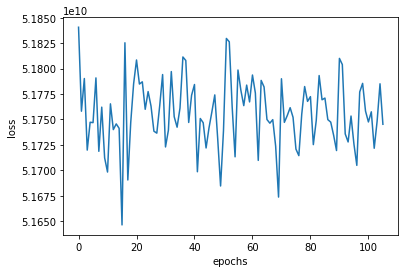

In [58]:
import matplotlib.pyplot as plt
x=history.epoch
y=history.history['loss']

plt.plot(x,y)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [59]:
pred=model.predict(X_test)
pred

array([[13772.657],
       [12730.067],
       [ 8998.04 ],
       ...,
       [ 7834.7  ],
       [ 9517.669],
       [15944.676]], dtype=float32)

In [60]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 589us/step - loss: 396196448.0000 - mae: 11524.6055


[396196448.0, 11524.60546875]

In [61]:
model.save('car_prediction_model_v1.h5')